# House price prediction


## Loading the Ames Housing Price dataset

In [2]:
import pandas as pd

In [3]:
AMES_HOUSING_CSV = "file2ed11cebe25.csv"
df = pd.read_csv(AMES_HOUSING_CSV)
df

MS_SubClass                 MS_Zoning  \
0     One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1     One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2     One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3     One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4                Two_Story_1946_and_Newer   Residential_Low_Density   
...                                   ...                       ...   
2925                  Split_or_Multilevel   Residential_Low_Density   
2926  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
2927                          Split_Foyer   Residential_Low_Density   
2928  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
2929             Two_Story_1946_and_Newer   Residential_Low_Density   

      Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0              141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1               80     11622   Pave  No_Alley_Access             Regular   
2               81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3               93     11160   Pave  No_Alley_Access             Regular   
4               74     13830   Pave  No_Alley_Access  Slightly_Irregular   
...            ...       ...    ...              ...                 ...   
2925            37      7937   Pave  No_Alley_Access  Slightly_Irregular   
2926             0      8885   Pave  No_Alley_Access  Slightly_Irregular   
2927            62     10441   Pave  No_Alley_Access             Regular   
2928            77     10010   Pave  No_Alley_Access             Regular   
2929            74      9627   Pave  No_Alley_Access             Regular   

     Land_Contour Utilities Lot_Config  ...            Fence Misc_Feature  \
0             Lvl    AllPub     Corner  ...         No_Fence         None   
1             Lvl    AllPub     Inside  ...  Minimum_Privacy         None   
2             Lvl    AllPub     Corner  ...         No_Fence         Gar2   
3             Lvl    AllPub     Corner  ...         No_Fence         None   
4             Lvl    AllPub     Inside  ...  Minimum_Privacy         None   
...           ...       ...        ...  ...              ...          ...   
2925          Lvl    AllPub    CulDSac  ...     Good_Privacy         None   
2926          Low    AllPub     Inside  ...  Minimum_Privacy         None   
2927          Lvl    AllPub     Inside  ...  Minimum_Privacy         Shed   
2928          Lvl    AllPub     Inside  ...         No_Fence         None   
2929          Lvl    AllPub     Inside  ...         No_Fence         None   

     Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition Sale_Price  \
0           0       5      2010       WD          Normal     215000   
1           0       6      2010       WD          Normal     105000   
2       12500       6      2010       WD          Normal     172000   
3           0       4      2010       WD          Normal     244000   
4           0       3      2010       WD          Normal     189900   
...       ...     ...       ...       ...            ...        ...   
2925        0       3      2006       WD          Normal     142500   
2926        0       6      2006       WD          Normal     131000   
2927      700       7      2006       WD          Normal     132000   
2928        0       4      2006       WD          Normal     170000   
2929        0      11      2006       WD          Normal     188000   

      Longitude   Latitude  
0    -93.619754  42.054035  
1    -93.619756  42.053014  
2    -93.619387  42.052659  
3    -93.617320  42.051245  
4    -93.638933  42.060899  
...         ...        ...  
2925 -93.604776  41.988964  
2926 -93.602680  41.988314  
2927 -93.606847  41.986510  
2928 -93.600190  41.990921  
2929 -93.599996  41.989265  

[2930 rows x 81 columns]

## Some basic data visualization

In [4]:
import folium
from folium.plugins import MarkerCluster


center = df[["Latitude", "Longitude"]].mean().values.tolist()
ames_map = folium.Map(location=center, zoom_start=13)
c = MarkerCluster(options={"maxClusterRadius": 40}).add_to(ames_map)

def make_tooltip(record):
    tooltip = f'<div>Sale_Price: ${record["Sale_Price"] / 1e3:.1f}k</div>'
    tooltip += f'<div>Gr_Liv_Area: {record["Gr_Liv_Area"]:.1f}</div>'
    tooltip += f'<div>Year_Built: {record["Year_Built"]:d}</div>'
    return tooltip

for i, record in df.iterrows():
    marker = folium.Marker((record["Latitude"], record["Longitude"]),
                           tooltip=make_tooltip(record))
    marker.add_to(c)

ames_map

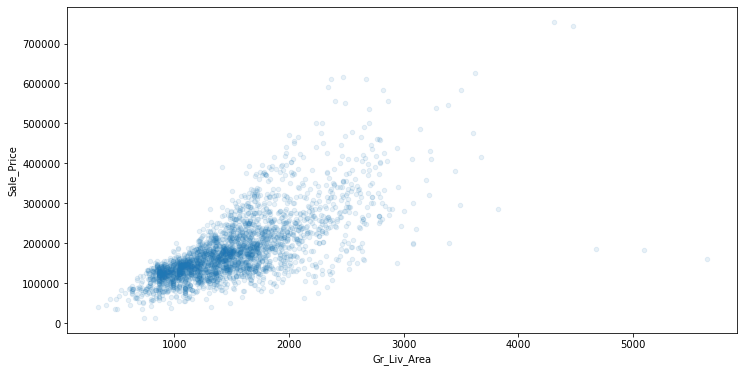

In [5]:
df.plot(x="Gr_Liv_Area", y="Sale_Price", kind="scatter",
        figsize=(12, 6), alpha=0.1);

## A baseline univariate linear model

In [6]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Sale_Price"])
y = df["Sale_Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=500, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

x_train = X_train["Gr_Liv_Area"].values.reshape(-1, 1)
x_test = X_test["Gr_Liv_Area"].values.reshape(-1, 1)

lr = LinearRegression().fit(x_train, y_train)
r2_score = lr.score(x_test, y_test)

print(f"R2 score (test): {r2_score:.3f}")

R2 score (test): 0.542


In [8]:
y_pred = lr.predict(X_test["Gr_Liv_Area"].values.reshape(-1, 1))

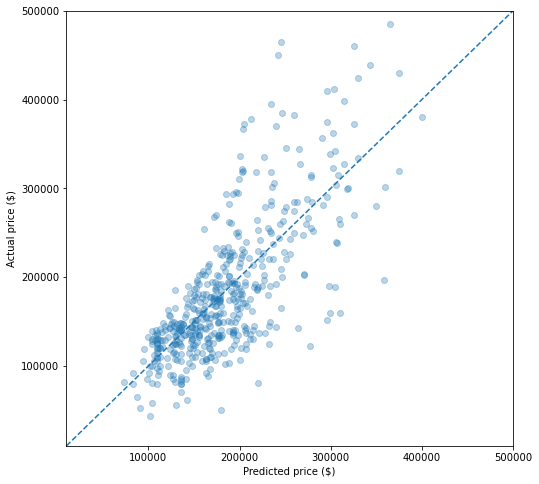

In [9]:
import matplotlib.pyplot as plt


def plot_predictions(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(y_pred, y_test, alpha=0.3)
    ax.plot([1e4, 5e5], [1e4, 5e5], linestyle="--")
    ax.set_xlim(1e4, 5e5); ax.set_ylim(1e4, 5e5)
    ax.set_xlabel("Predicted price ($)")
    ax.set_ylabel("Actual price ($)")


plot_predictions(y_test, y_pred)

In [10]:
import numpy as np


def mean_absolute_percent_error(y_true, y_pred):
    diffs = np.abs(y_true - y_pred)
    scales = np.abs(y_true) + np.finfo(np.float64).eps
    return np.mean(diffs / scales) * 100


mape = mean_absolute_percent_error(y_test, y_pred)

print(f"MAPE (test): {mape:.3f}")

MAPE (test): 23.166


## Fitting a non linear, multi-variate model

In [11]:
X_train.head()

MS_SubClass                   MS_Zoning  \
483                    Two_Story_1946_and_Newer     Residential_Low_Density   
2585        One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
2288               Two_Story_PUD_1946_and_Newer  Residential_Medium_Density   
141         One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
2041  Two_Family_conversion_All_Styles_and_Ages  Residential_Medium_Density   

      Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
483              0      8795   Pave  No_Alley_Access  Slightly_Irregular   
2585            75     10170   Pave  No_Alley_Access             Regular   
2288            21      2001   Pave  No_Alley_Access             Regular   
141             70     10552   Pave  No_Alley_Access  Slightly_Irregular   
2041            60     10120   Pave  No_Alley_Access  Slightly_Irregular   

     Land_Contour Utilities Lot_Config  ...  Pool_QC            Fence  \
483           Lvl    AllPub     Inside  ...  No_Pool         No_Fence   
2585          Lvl    AllPub     Corner  ...  No_Pool         No_Fence   
2288          Lvl    AllPub     Inside  ...  No_Pool         No_Fence   
141           Lvl    AllPub     Inside  ...  No_Pool         No_Fence   
2041          Bnk    AllPub     Inside  ...  No_Pool  Minimum_Privacy   

     Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition  \
483          None        0       4      2009       WD          Normal   
2585         None        0       6      2006       WD          Normal   
2288         None        0       1      2007       WD          Normal   
141          None        0       4      2010       WD          Normal   
2041         None        0       1      2007       WD          Normal   

      Longitude   Latitude  
483  -93.642813  42.058590  
2585 -93.617069  42.038357  
2288 -93.601507  41.991709  
141  -93.617704  42.043084  
2041 -93.622025  42.025893  

[5 rows x 80 columns]

In [12]:
def caterogical_columns(df):
    return df.columns[df.dtypes == object]

len(caterogical_columns(df))

46

In [13]:
def numeric_columns(df):
    return df.columns[df.dtypes != object]


len(numeric_columns(df))

35

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor


categories = [df[c].unique() for c in caterogical_columns(df)]
ord_encoder =  OrdinalEncoder(categories=categories)

preprocessor = ColumnTransformer([
    ("categorical", ord_encoder, caterogical_columns),
    ("numeric", "passthrough", numeric_columns),
])

hgb = HistGradientBoostingRegressor(
    max_leaf_nodes=3,
    learning_rate=0.5,
    early_stopping=True,
    n_iter_no_change=10,
    max_bins=5,
    max_iter=1000,
    random_state=0,
)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", hgb),
])

In [15]:

_ = model.fit(X_train, y_train)

In [16]:
model[-1].n_iter_

129

In [17]:
r2_score_train = model.score(X_train, y_train)
print(f"r2 score (train): {r2_score_train:.3f}")

r2 score (train): 0.926


In [18]:
test_r2_score = model.score(X_test, y_test)
print(f"r2 score (test): {test_r2_score:.3f}")

r2 score (test): 0.897


In [19]:
y_pred = model.predict(X_test)
mape = mean_absolute_percent_error(y_test, y_pred)
print(f"MAPE: {mape:.1f}%")

MAPE: 9.7%


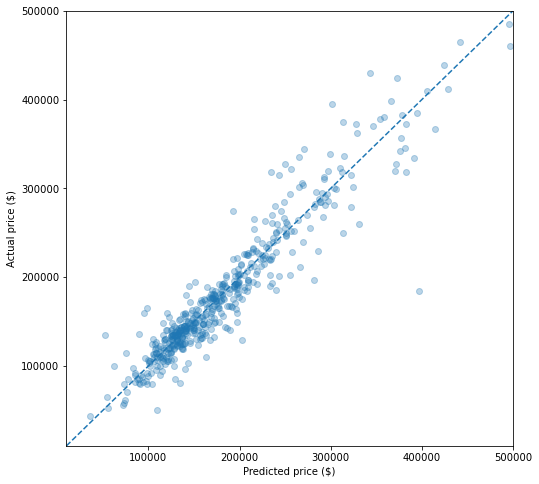

In [20]:
y_pred = model.predict(X_test)
plot_predictions(y_test, y_pred)

## Selecting the most important variables

In [21]:
from sklearn.inspection import permutation_importance


pi = permutation_importance(model, X_test, y_test, n_repeats=5,
                            random_state=42, n_jobs=2)

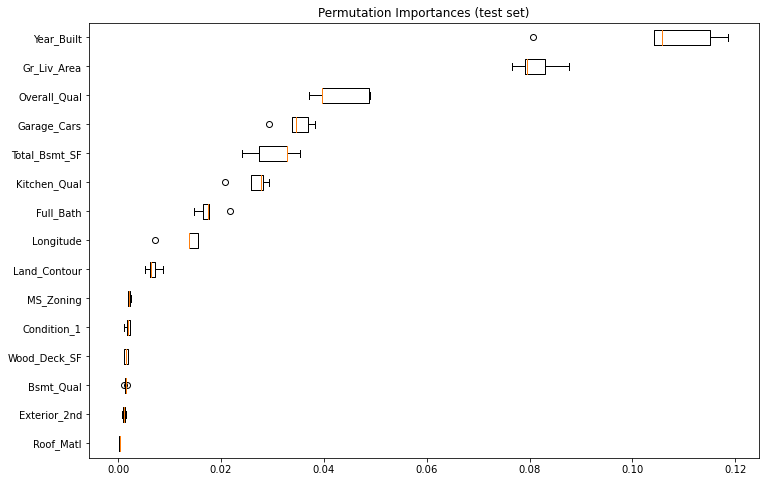

In [22]:
sorted_idx = pi.importances_mean.argsort()
most_important_idx = [
    i for i in sorted_idx
    if pi.importances_mean[i] - 4 * pi.importances_std[i] > 0
]
most_important_names = df.columns[most_important_idx]
fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(pi.importances[most_important_idx].T,
           vert=False, labels=most_important_names)
ax.set_title("Permutation Importances (test set)");

## Retraining a simpler model on the most important features only

In [23]:
feature_subset = most_important_names.tolist()
if "Latitude" not in feature_subset:
    feature_subset += ["Latitude"]
if "Longitude" not in feature_subset:
    feature_subset += ["Longitude"]

In [24]:
len(numeric_columns(df[feature_subset]))

8

In [25]:
len(caterogical_columns(df[feature_subset]))

8

In [26]:
X_train[feature_subset]

Roof_Matl Exterior_2nd Bsmt_Qual  Wood_Deck_SF Condition_1  \
483    CompShg      VinylSd      Good           224        Norm   
2585   CompShg      Wd Sdng   Typical             0        Norm   
2288   CompShg      CmentBd   Typical             0        Norm   
141    CompShg      BrkFace   Typical             0        Norm   
2041   CompShg      Wd Sdng   Typical             0       Feedr   
...        ...          ...       ...           ...         ...   
763    CompShg      Plywood      Good           120        Norm   
835    CompShg      VinylSd      Good           168        Norm   
1653   CompShg      HdBoard   Typical             0        Norm   
2607   CompShg      VinylSd   Typical             0        Norm   
2732   CompShg      MetalSd   Typical           237        Norm   

                       MS_Zoning Land_Contour  Longitude  Full_Bath  \
483      Residential_Low_Density          Lvl -93.642813          2   
2585     Residential_Low_Density          Lvl -93.617069          1   
2288  Residential_Medium_Density          Lvl -93.601507          1   
141      Residential_Low_Density          Lvl -93.617704          1   
2041  Residential_Medium_Density          Bnk -93.622025          1   
...                          ...          ...        ...        ...   
763      Residential_Low_Density          Lvl -93.658173          3   
835      Residential_Low_Density          Low -93.691883          1   
1653     Residential_Low_Density          Lvl -93.638554          2   
2607     Residential_Low_Density          Lvl -93.608984          1   
2732     Residential_Low_Density          Lvl -93.666035          1   

     Kitchen_Qual  Total_Bsmt_SF  Garage_Cars   Overall_Qual  Gr_Liv_Area  \
483          Good            952            2           Good         2256   
2585         Good            216            2  Above_Average         1575   
2288      Typical            546            1  Below_Average         1092   
141          Good           1398            2        Average         1700   
2041      Typical            925            1           Good         1889   
...           ...            ...          ...            ...          ...   
763       Typical           1200            0        Average         1200   
835          Good           1040            2        Average         1040   
1653      Typical            539            2           Good         1725   
2607      Typical           1024            2        Average         1086   
2732      Typical            967            2  Below_Average         1350   

      Year_Built   Latitude  
483         2000  42.058590  
2585        1951  42.038357  
2288        1970  41.991709  
141         1959  42.043084  
2041        1910  42.025893  
...          ...        ...  
763         1987  42.028098  
835         1996  42.021171  
1653        1979  42.052353  
2607        1966  42.040811  
2732        1954  42.026530  

[2430 rows x 16 columns]

In [27]:


categories = [df[c].unique()
              for c in caterogical_columns(df[feature_subset])]
ord_encoder =  OrdinalEncoder(categories=categories)

preprocessor = ColumnTransformer([
    ("categorical", ord_encoder, caterogical_columns),
    ("numeric", "passthrough", numeric_columns),
])
hgb = HistGradientBoostingRegressor(
    max_leaf_nodes=16,
    learning_rate=0.1,
    min_samples_leaf=5,
    early_stopping=True,
    n_iter_no_change=5,
    max_iter=1000,
    random_state=0,
)
reduced_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", hgb),
])

_= reduced_model.fit(X_train[feature_subset], y_train)

In [28]:

_ = reduced_model.fit(X_train[feature_subset], y_train)

In [29]:
reduced_model[-1].n_iter_

80

In [30]:
r2_score_train = reduced_model.score(X_train[feature_subset], y_train)
print(f"r2 score (train): {r2_score_train:.3f}")

r2 score (train): 0.949


In [31]:
test_r2_score = reduced_model.score(X_test[feature_subset], y_test)
print(f"r2 score (test): {test_r2_score:.3f}")

r2 score (test): 0.903


In [32]:
y_pred = reduced_model.predict(X_test[feature_subset])
mape = mean_absolute_percent_error(y_test, y_pred)
print(f"MAPE: {mape:.1f}%")

MAPE: 10.0%


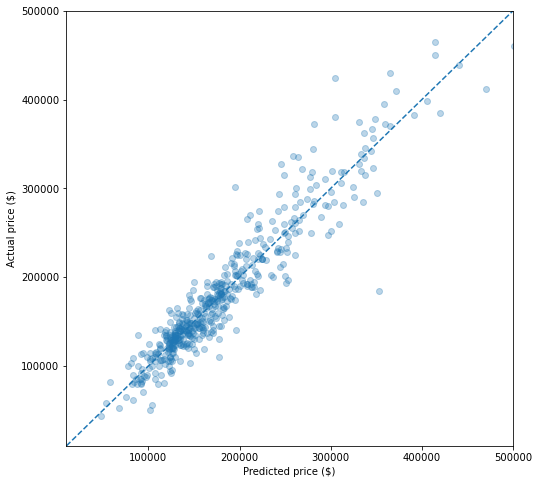

In [33]:
plot_predictions(y_test, y_pred)

## Model inspection

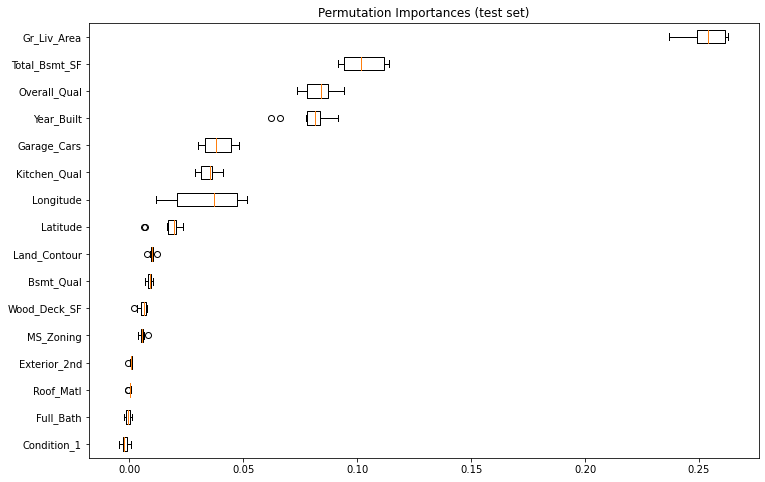

In [34]:
from sklearn.inspection import permutation_importance


pi = permutation_importance(reduced_model, X_test[feature_subset], y_test, n_repeats=10,
                            random_state=42, n_jobs=2)

sorted_idx = pi.importances_mean.argsort()
sorted_names = np.array(feature_subset)[sorted_idx]
fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(pi.importances[sorted_idx].T,
           vert=False, labels=sorted_names)
ax.set_title("Permutation Importances (test set)");

In [37]:
# %pip install -q git+https://github.com/slundberg/shap

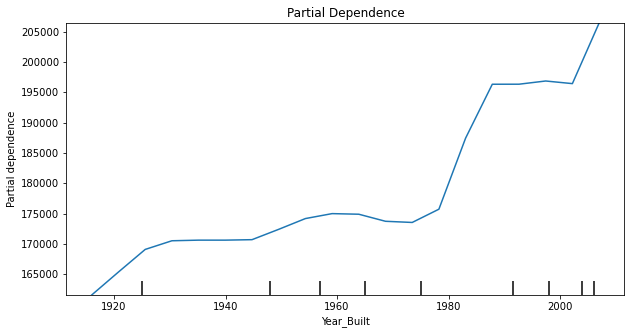

In [36]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Partial Dependence")
plot_partial_dependence(reduced_model, X_test[feature_subset],
                        ["Year_Built"], grid_resolution=20, ax=ax);

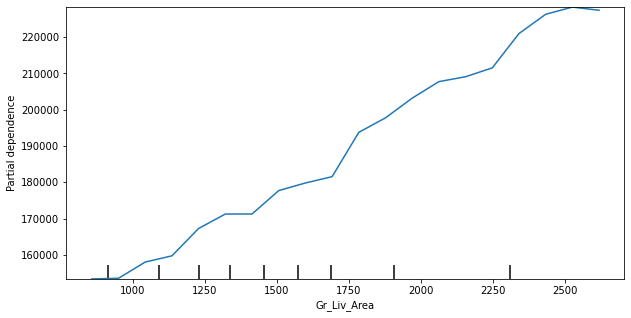

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_partial_dependence(reduced_model, X_test[feature_subset], ["Gr_Liv_Area"],
                        grid_resolution=20, ax=ax);

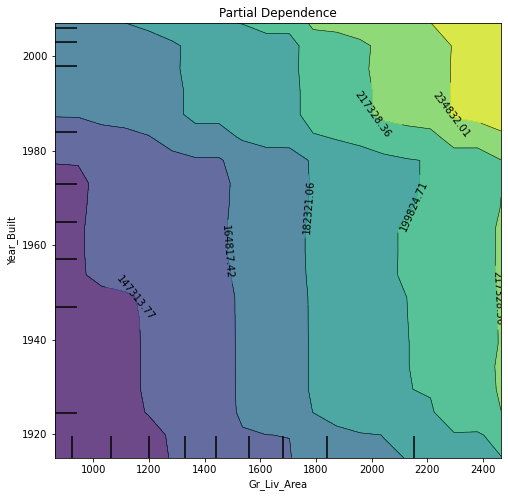

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Partial Dependence")
plot_partial_dependence(reduced_model, X[feature_subset], [["Gr_Liv_Area", "Year_Built"]],
                        grid_resolution=20, contour_kw={"alpha": 0.8}, ax=ax);

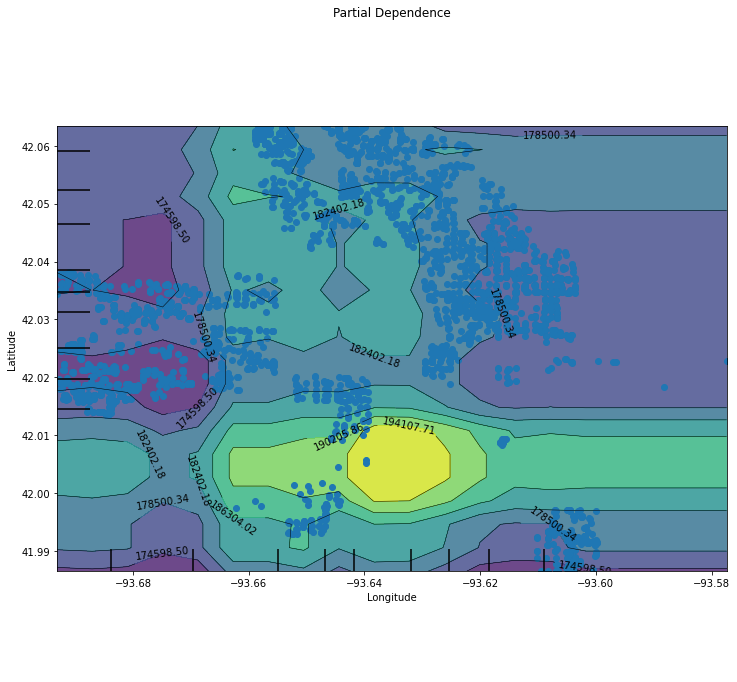

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Partial Dependence")
plot_partial_dependence(reduced_model, X[feature_subset],
                        [["Longitude", "Latitude"]],
                        percentiles=(0., 1.),
                        grid_resolution=20, contour_kw={"alpha": 0.8}, ax=ax)
ax = fig.gca()
ax.set_xlim(X["Longitude"].min(), X["Longitude"].max())
ax.set_ylim(X["Latitude"].min(), X["Latitude"].max())
ax.set_aspect("equal")
ax.scatter(X["Longitude"], X["Latitude"]);

## Model selection: hyperparameter tuning

In [40]:
HistGradientBoostingRegressor()

HistGradientBoostingRegressor()

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

categories = [df[c].unique()
              for c in caterogical_columns(df)]
ord_encoder =  OrdinalEncoder(categories=categories)

preprocessor = ColumnTransformer([
    ("categorical", ord_encoder, caterogical_columns),
    ("numeric", "passthrough", numeric_columns),
])
hgb = HistGradientBoostingRegressor(
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=1000,
)
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", hgb),
])


params = {
    "regressor__learning_rate": np.logspace(-3, 0, 10),
    "regressor__max_leaf_nodes": [2, 3, 4, 5, 6, 8, 16, 32, 64],
    "regressor__max_bins": [3, 5, 10, 30, 50, 100, 255],
    "regressor__min_samples_leaf": [1, 2, 5, 10, 20, 50, 100],
}
search = RandomizedSearchCV(model, params, n_iter=200, cv=3,
                            n_jobs=4, verbose=1)

In [44]:
# _ = search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  7.2min finished


In [45]:
# cv_results = pd.DataFrame(search.cv_results_)
# cv_results = cv_results.sort_values("mean_test_score", ascending=False)
# cv_results.to_json("ames_gbrt_search_results.json")

In [46]:
cv_results = pd.read_json("ames_gbrt_search_results.json")

In [47]:
def rename_param(column_name):
    if "__" in column_name:
        return column_name.rsplit("__", 1)[1]
    return column_name

In [48]:
cv_results.rename(rename_param, axis=1).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
135       2.463415      0.378110         0.068484        0.006829   
143       1.801850      0.330895         0.078124        0.005423   
60        1.268276      0.185322         0.063497        0.002860   
163       4.406554      0.343324         0.111036        0.004702   
19        8.369294      1.045016         0.078456        0.003084   

     min_samples_leaf  max_leaf_nodes  max_bins  learning_rate  \
135                 5              16       100       0.021544   
143                20              16        10       0.046416   
60                 10              16        50       0.046416   
163                 5              16        50       0.010000   
19                 10              32       255       0.046416   

                                                params  split0_test_score  \
135  {'regressor__min_samples_leaf': 5, 'regressor_...           0.885508   
143  {'regressor__min_samples_leaf': 20, 'regressor...           0.880135   
60   {'regressor__min_samples_leaf': 10, 'regressor...           0.879409   
163  {'regressor__min_samples_leaf': 5, 'regressor_...           0.882094   
19   {'regressor__min_samples_leaf': 10, 'regressor...           0.879869   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
135           0.891412           0.919697         0.898873        0.014921   
143           0.894793           0.917618         0.897515        0.015423   
60            0.894826           0.915743         0.896660        0.014890   
163           0.882367           0.925332         0.896598        0.020319   
19            0.889665           0.909336         0.892957        0.012253   

     rank_test_score  
135                1  
143                2  
60                 3  
163                4  
19                 5

### Interactions between hyperparameters and generalization

In [50]:
import plotly.express as px


fig = px.parallel_coordinates(
    cv_results.rename(rename_param, axis=1).apply({
        "learning_rate": np.log10,
        "max_leaf_nodes": np.log2,
        "max_bins": np.log2,
        "mean_test_score": lambda x: x,
    }),
    color="mean_test_score",
    color_continuous_scale=px.colors.diverging.Portland,
)
fig.show()

Let's zoom on the top performing models by using the `query` methods of the dataframe. Note that the axis have a narrower range now:

In [51]:
fig = px.parallel_coordinates(
    cv_results.rename(rename_param, axis=1).apply({
        "learning_rate": np.log10,
        "max_leaf_nodes": np.log2,
        "max_bins": np.log2,
        "mean_test_score": lambda x: x,
    }).query("mean_test_score > 0.88"),
    color="mean_test_score",
    color_continuous_scale=px.colors.diverging.Portland,
)
fig.show()

Let's check that the inner CV scores still approximately reflect the true generatlization score measured on held out data even when we select the best model from hundred of possible candidates via random search:

In [52]:
best_search_result = cv_results.nlargest(n=1, columns=["mean_test_score"]).iloc[0]
print(f'R2 score of best candidate (inner CV): {best_search_result["mean_test_score"]:.3f}'
      f' (+/-{3 * best_search_result["std_test_score"]:.3f})')

R2 score of best candidate (inner CV): 0.899 (+/-0.045)


In [53]:
model.set_params(**best_search_result["params"])
model.fit(X_train, y_train)
held_out_score = model.score(X_test, y_test)
print(f'R2 score of best candidate on held-out data: {held_out_score:.3f}')

R2 score of best candidate on held-out data: 0.917


### Exploration of the accuracy / prediction latency trade-off

In [54]:
cv_results["safe_test_score"] = cv_results["mean_test_score"] - cv_results["std_test_score"]

In [55]:
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()


param_names = [c for c in cv_results.columns
               if c.startswith("param_")]
fig = px.scatter(cv_results, x="mean_score_time", y="safe_test_score",
                 hover_data=param_names)

fig.show()